<a href="https://colab.research.google.com/github/lucandro/IBM/blob/main/EDA_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del aterrizaje de la primera etapa del Falcon 9 de SpaceX

## Tarea:
 Exploración y preparación de datos

Tiempo necesario estimado: 70 minutos

En esta tarea, predeciremos si la primera etapa del Falcon 9 aterrizará con éxito. SpaceX anuncia lanzamientos de cohetes Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno, gran parte de los ahorros se deben al hecho de que SpaceX puede reutilizar la primera etapa.

En este laboratorio, realizará análisis exploratorio de datos e ingeniería de características.

La primera etapa del Falcon 9 aterrizará con éxito

## Objetivos

Realizar análisis exploratorio de datos e ingeniería de características con Pandas y Matplotlib

- Análisis exploratorio de datos
- Preparación de la ingeniería de características de datos

In [1]:
# Pandas es una biblioteca de software escrita para el lenguaje de programación Python para la manipulación y el análisis de datos.
import pandas as pd
#NumPy es una biblioteca para el lenguaje de programación Python, que agrega compatibilidad con matrices y arreglos multidimensionales grandes, junto con una gran colección de funciones matemáticas de alto nivel para operar en estos arreglos.
import numpy as np
# Matplotlib es una biblioteca de gráficos para Python y Pyplot nos brinda un marco de trabajo de gráficos similar a MatLab. Lo usaremos en nuestra función de trazador para representar gráficamente los datos.
import matplotlib.pyplot as plt
#Seaborn es una biblioteca de visualización de datos Python basada en Matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
import seaborn as sns

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


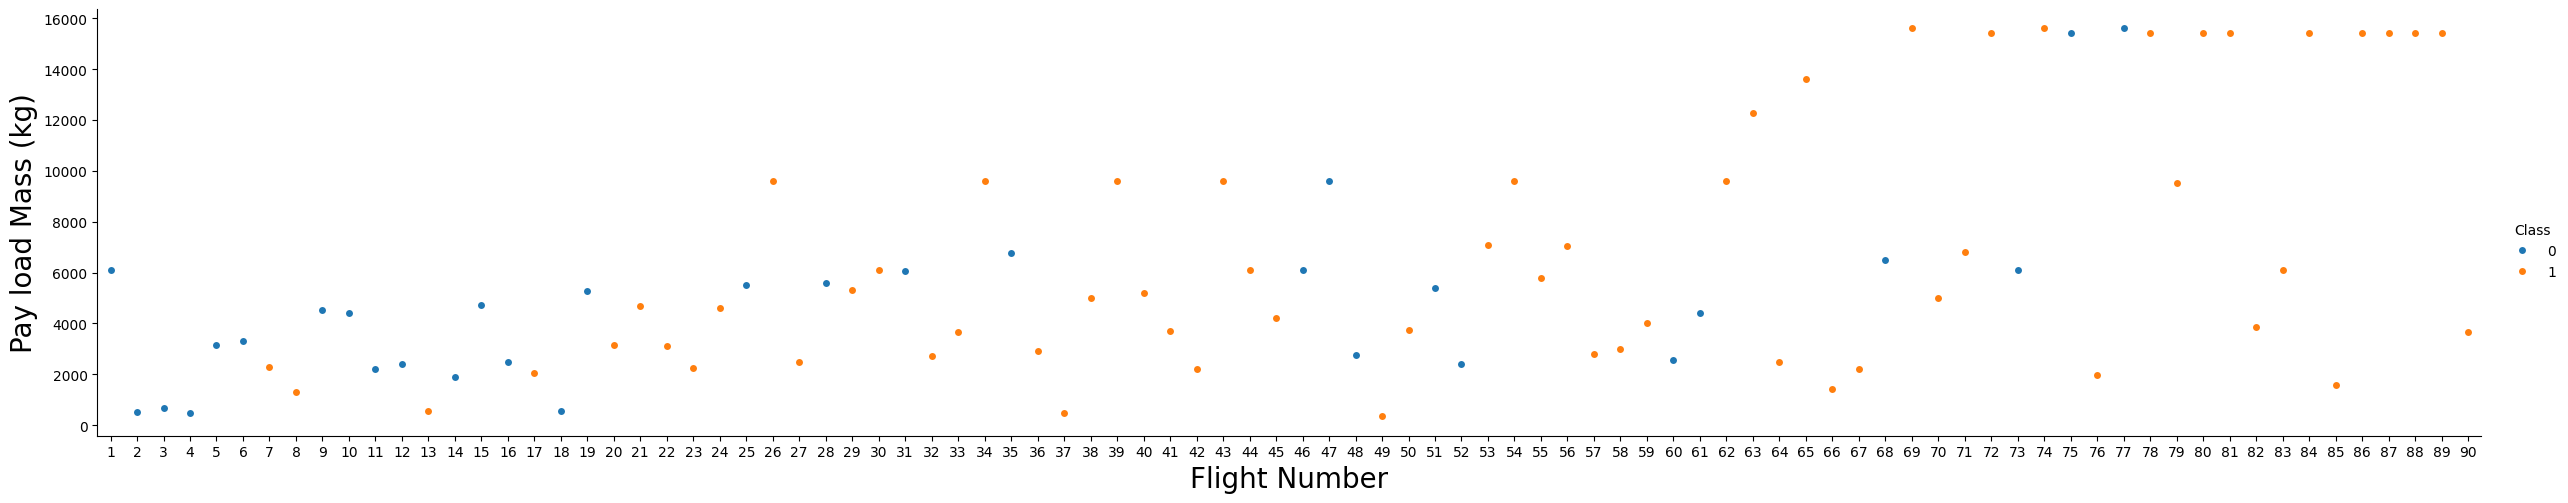

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, analicemos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.

## TAREA 1:
Visualizar la relación entre el número de vuelo y el lugar de despegue

Utilice la función catplot para representar gráficamente el número de vuelo frente al lugar de despegue, establezca el parámetro x en el número de vuelo, establezca y en el lugar de despegue y establezca el parámetro hue en 'class'

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


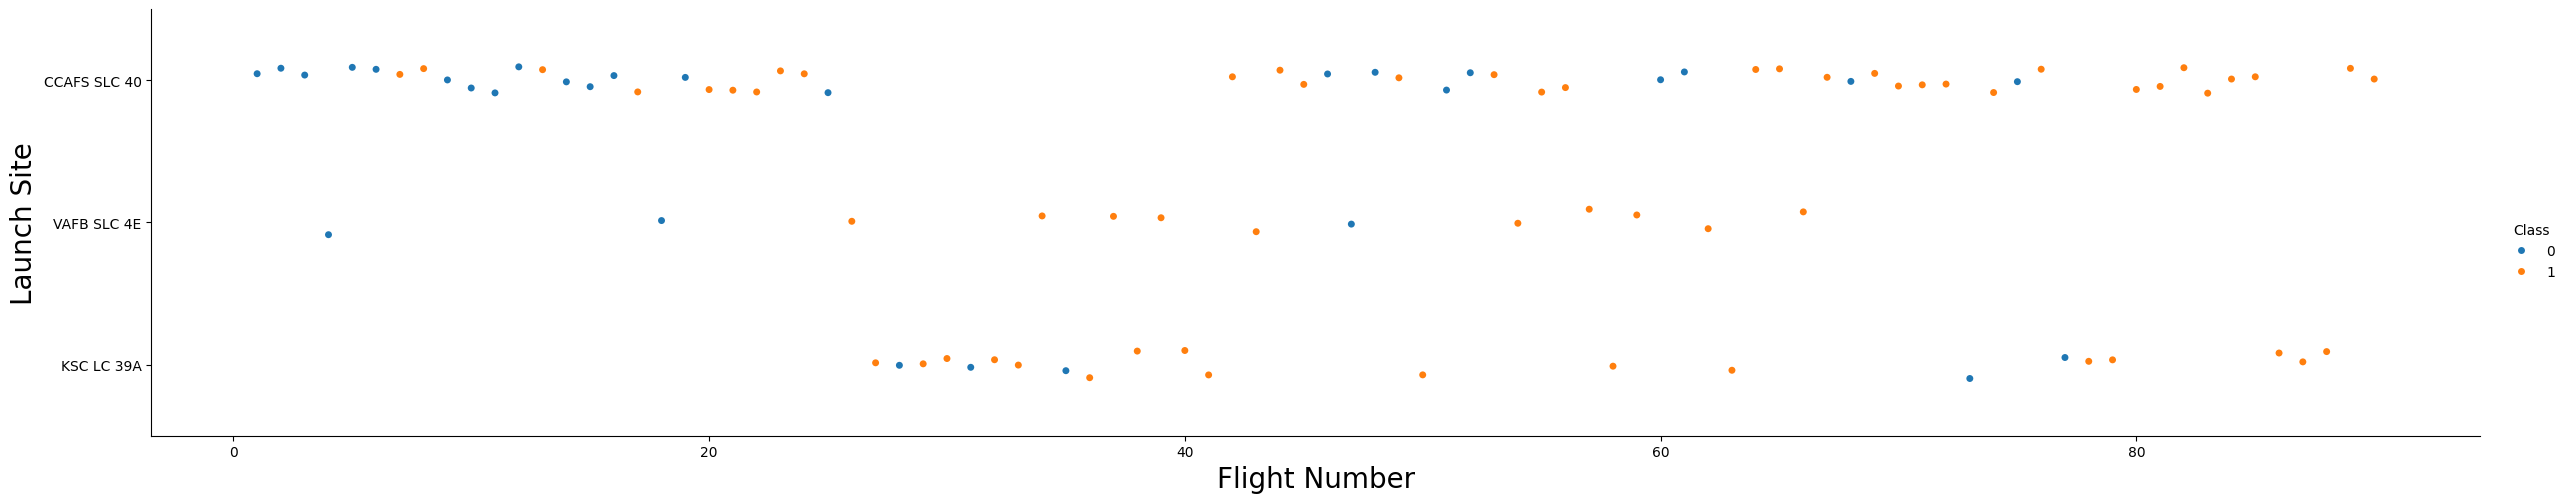

In [4]:
# Dibuje un gráfico de puntos de dispersión con el eje x como número de vuelo,
# el eje y como sitio de lanzamiento y el tono como valor de clase.
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Ahora, intenta explicar los patrones que encontraste en los gráficos de puntos de dispersión de Número de vuelo vs. Sitio de lanzamiento.

## TAREA 2:
Visualiza la relación entre la masa de la carga útil y el sitio de lanzamiento

También queremos observar si existe alguna relación entre los sitios de lanzamiento y su masa de carga útil.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


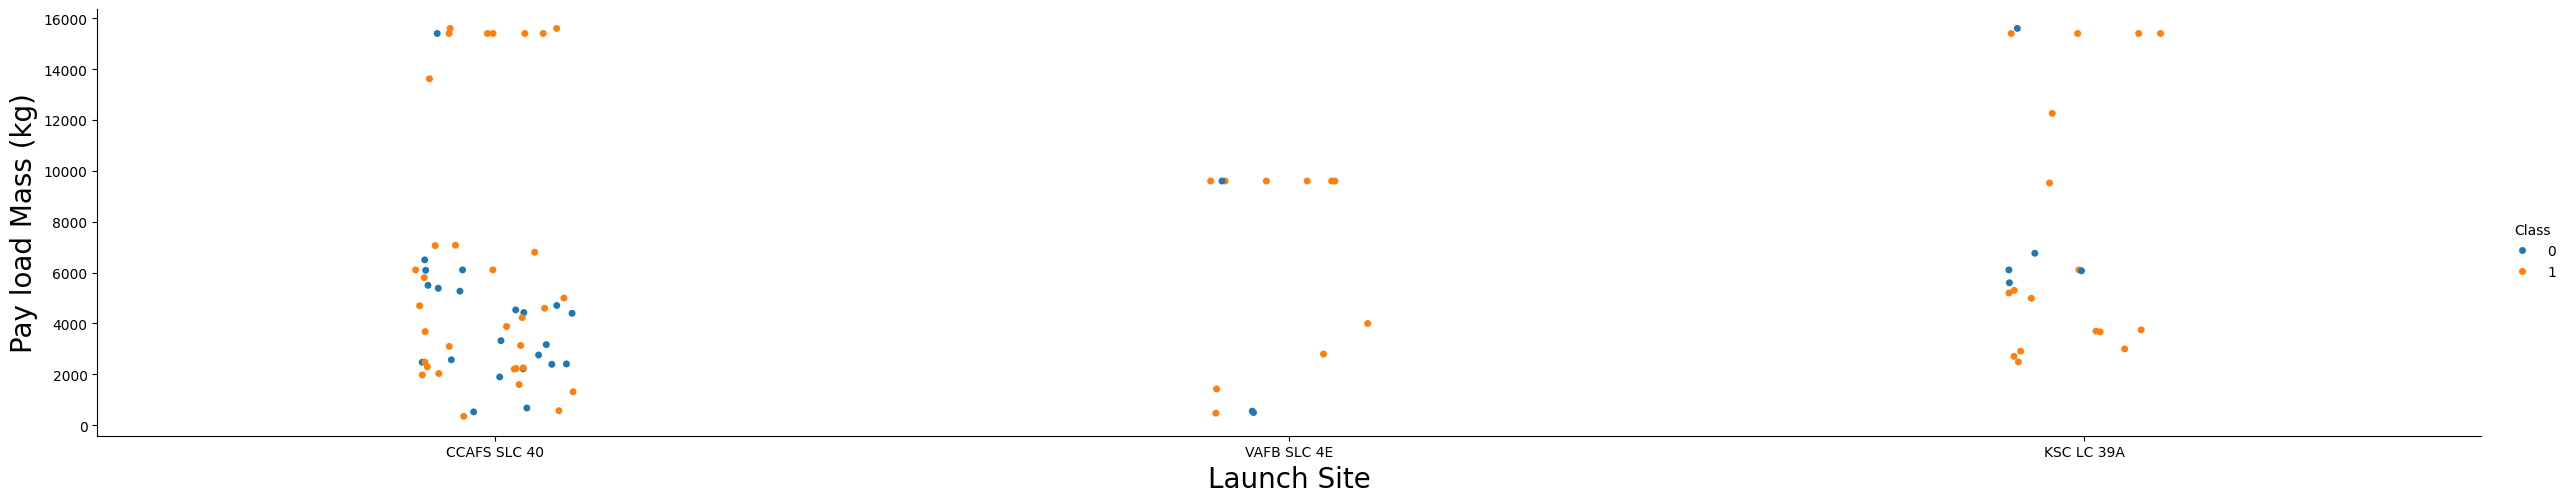

In [5]:
# Dibuje un diagrama de puntos de dispersión con el eje x como masa de carga útil (kg),
# el eje y como sitio de lanzamiento y el tono como valor de clase.
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Ahora, si observa el gráfico de puntos de dispersión de la masa de la carga útil frente al lugar de lanzamiento, verá que en el lugar de lanzamiento de VAFB-SLC no se lanzaron cohetes con una masa de carga útil pesada (superior a 10 000).
## TAREA 3:
Visualizar la relación entre la tasa de éxito de cada tipo de órbita

A continuación, queremos comprobar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.

Creemos un gráfico de barras para la tasa de éxito de cada órbita

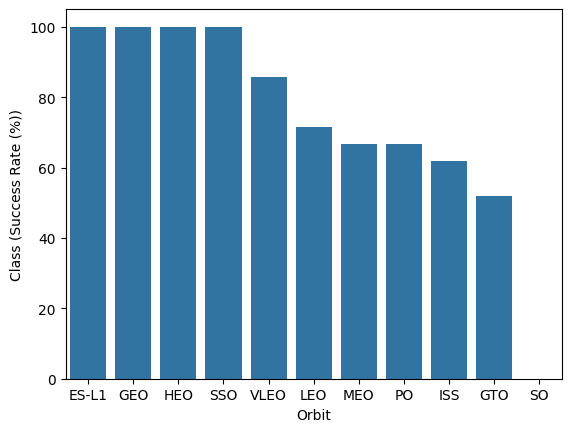

In [6]:
# SUGERENCIA: use el método groupby en la columna Órbita y obtenga la media de la columna Clase
sr_df = df.groupby('Orbit')['Class'].mean().reset_index().sort_values(by='Class', ascending=False)
sr_df['Class'] = sr_df['Class'] * 100


sns.barplot(data=sr_df, x='Orbit', y='Class')
plt.xlabel('Orbit')
plt.ylabel('Class (Success Rate (%))')
plt.show()

Analice el gráfico de barras para identificar qué órbitas tienen las tasas de éxito más altas.

## TAREA 4:
Visualice la relación entre FlightNumber y el tipo de órbita

Para cada órbita, queremos ver si existe alguna relación entre FlightNumber y el tipo de órbita.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


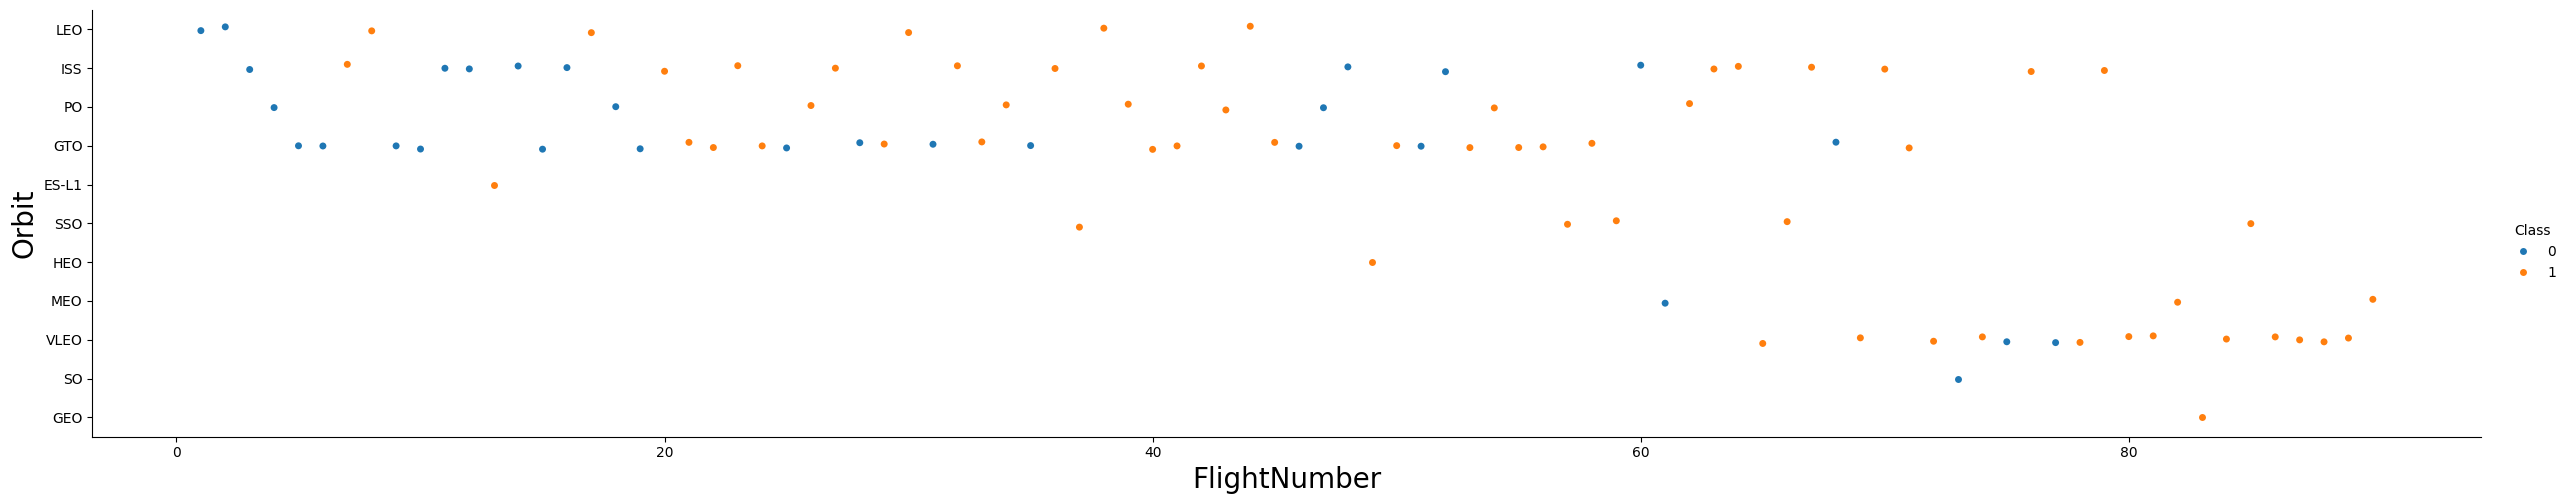

In [7]:
# Dibuje un gráfico de puntos de dispersión con el eje x como FlightNumber y el eje y como la órbita, y el tono como el valor de la clase.
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

Se puede observar que en la órbita LEO, el éxito parece estar relacionado con la cantidad de vuelos. Por el contrario, en la órbita GTO, no parece haber relación entre la cantidad de vuelos y el éxito.
## TAREA 5:
Visualizar la relación entre la masa de la carga útil y el tipo de órbita

De manera similar, podemos trazar los gráficos de puntos de dispersión de la masa de la carga útil frente a la órbita para revelar la relación entre la masa de la carga útil y el tipo de órbita

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


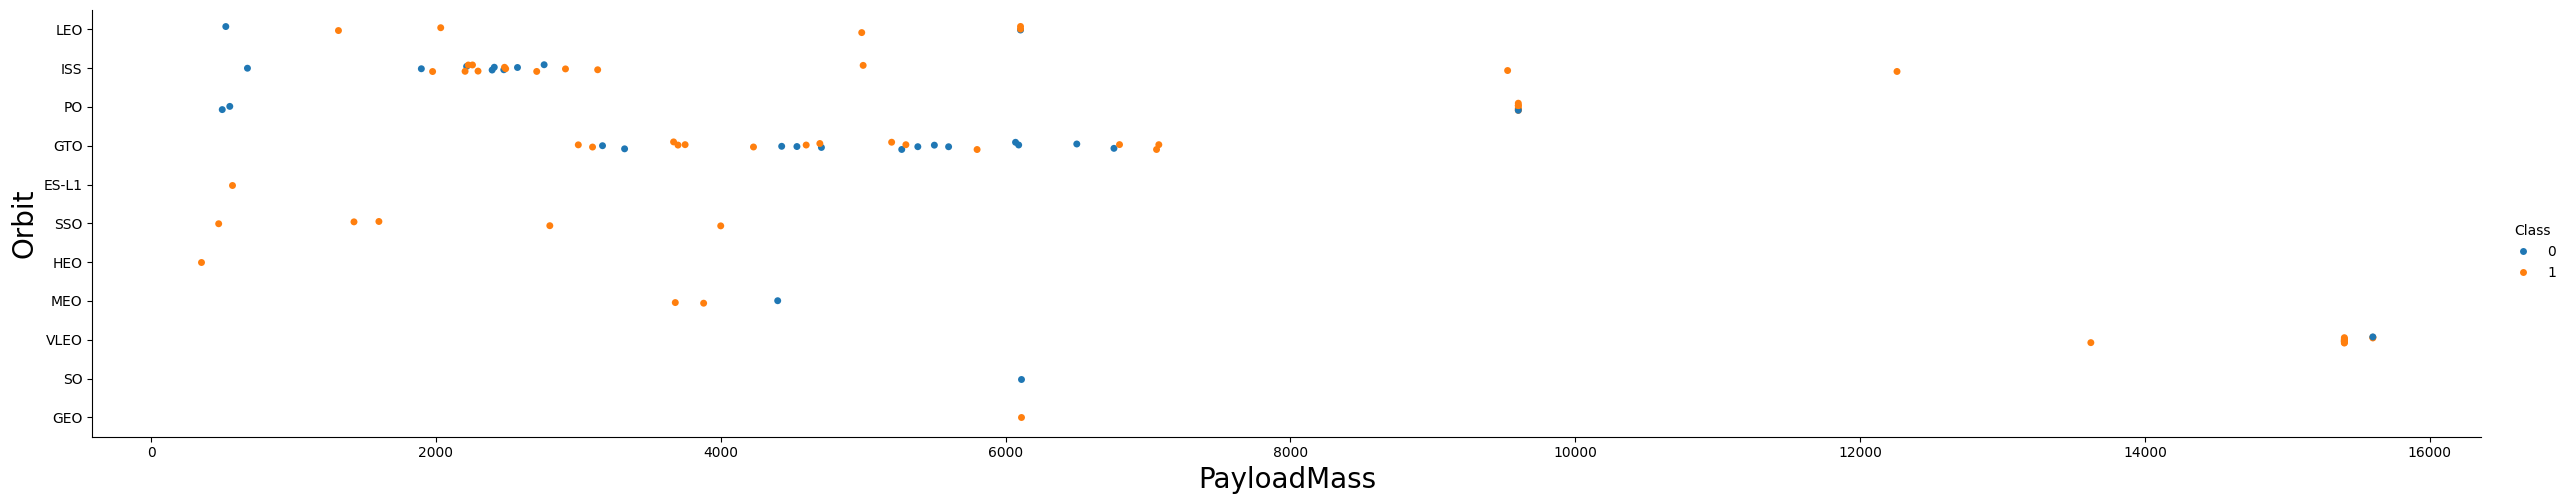

In [8]:
# Dibuje un gráfico de puntos de dispersión con el eje x como carga útil, el eje y como órbita y el tono como valor de clase.
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

Con cargas útiles pesadas, la tasa de aterrizajes exitosos o de aterrizajes positivos es mayor para Polar, LEO e ISS.

Sin embargo, para GTO, es difícil distinguir entre aterrizajes exitosos y fallidos, ya que ambos resultados están presentes.
## TAREA 6:
Visualizar la tendencia anual de éxito de lanzamiento

Puede trazar un gráfico de líneas con el eje x como Año y el eje y como la tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.

La función lo ayudará a obtener el año a partir de la fecha:

In [9]:
# Una función para extraer años de la fecha
def Extract_year(year):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

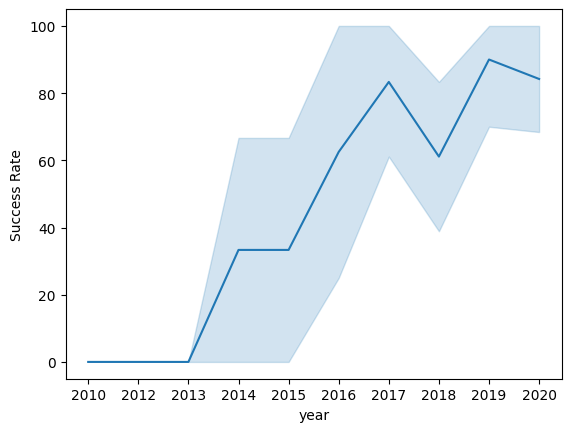

In [10]:
# Dibuje un gráfico de líneas con el eje x como el año extraído y el eje y como la tasa de éxito
year = []
df["year"] = Extract_year(year)
df["Success Rate"] = df["Class"] * 100
sns.lineplot(data = df, x = "year", y = "Success Rate")
plt.show()

Puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2020
## Ingeniería de características

A esta altura, debería obtener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito; seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.

In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## TAREA 7:
Crear variables ficticias para columnas categóricas

Utilice la función get_dummies y el marco de datos features para aplicar OneHotEncoder a las columnas Orbits, LaunchSite, LandingPad y Serial. Asigne el valor a la variable features_one_hot y muestre los resultados utilizando el método head. El marco de datos de resultados debe incluir todas las características, incluidas las codificadas.

In [12]:
# Utilice la función get_dummies() en las columnas categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


## TAREA 8:
Convertir todas las columnas numéricas a float64

Ahora que nuestro marco de datos features_one_hot solo contiene números, convierta todo el marco de datos al tipo de variable float64

In [13]:
# SUGERENCIA: use la función astype
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)